# Laptop Pricing Dataset
This dataset is a collection of features related to various laptops, such as brand, processor type, RAM, storage capacity, and other specifications. The dataset also includes the corresponding prices of these laptops. This dataset can be used for regression analysis to predict the prices of laptops based on their features. 

### Project goal: cleaning the dataset.

# 1. Download libraries

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

# 2. Import dataset

In [2]:
url = "/kaggle/input/laptop-pricing/laptop_pricing_dataset.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
# Display the first five rows of the data:

df.head(5)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [5]:
# Update the Screen_Size_cm column such that all values are rounded to nearest 2 decimal places:

df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)

In [6]:
# Check the result:
 
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


# 3. Identify and handle missing values

In [7]:
# Evaluate for Missing Data:

missing_data = df.isnull()

In [8]:
# Check the result:

print(missing_data.head())

   Unnamed: 0  Manufacturer  Category  Screen    GPU     OS  CPU_core  \
0       False         False     False   False  False  False     False   
1       False         False     False   False  False  False     False   
2       False         False     False   False  False  False     False   
3       False         False     False   False  False  False     False   
4       False         False     False   False  False  False     False   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0           False          False   False           False      False  False  
1           False          False   False           False      False  False  
2           False          False   False           False      False  False  
3           False          False   False           False      False  False  
4           False          False   False           False      False  False  


In [9]:
# Count missing values in each column:

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

Unnamed: 0
Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
Manufacturer
False    238
Name: count, dtype: int64

Category
Category
False    238
Name: count, dtype: int64

Screen
Screen
False    238
Name: count, dtype: int64

GPU
GPU
False    238
Name: count, dtype: int64

OS
OS
False    238
Name: count, dtype: int64

CPU_core
CPU_core
False    238
Name: count, dtype: int64

Screen_Size_cm
Screen_Size_cm
False    234
True       4
Name: count, dtype: int64

CPU_frequency
CPU_frequency
False    238
Name: count, dtype: int64

RAM_GB
RAM_GB
False    238
Name: count, dtype: int64

Storage_GB_SSD
Storage_GB_SSD
False    238
Name: count, dtype: int64

Weight_kg
Weight_kg
False    233
True       5
Name: count, dtype: int64

Price
Price
False    238
Name: count, dtype: int64



### Conclusion:
Based on the summary above, each column has 238 rows of data and two of the columns containing missing data:

"Weight_kg": 5 missing data
"Screen_Size_cm": 4 missing data

In [10]:
# Calculate the mean value for the "Weight_kg" column:

avg_weight= df['Weight_kg'].astype('float').mean(axis=0)
print("Average of Weight_kg:", avg_weight)

Average of Weight_kg: 1.8622317596566522


In [11]:
# Replace "NaN" with mean value in "Weight_kg" column:

df['Weight_kg'].replace(np.nan, avg_weight, inplace=True)

In [12]:
# Calculate the most common value in the "Screen_Size_cm" column:

common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()

In [13]:
# Replace the missing 'Screen_Size_cm' values by the most frequent:

df["Screen_Size_cm"].replace(np.nan, common_screen_size, inplace=True)

# 4. Correct data format

In [14]:
# List the data types for each column:

df.dtypes

Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

In [15]:
# Convert data types to proper format:

df[['Screen_Size_cm', 'Weight_kg']] = df[['Screen_Size_cm', 'Weight_kg']].astype('float')

In [16]:
# Check the result:

df.dtypes

Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

# 5. Data Standardization

In [17]:
# Transform 'cm' to 'inch' in column "Screen_Size_cm" (1 inch = 2.54 cm):

df["Screen_Size_cm"] = df["Screen_Size_cm"]/2.54

In [18]:
# Rename the column:

df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'}, inplace=True)

In [19]:
# Transform 'kg' to 'pounds' in column "Weight_kg" (1 kg = 2.205 pounds):

df["Weight_kg"] = df["Weight_kg"]*2.205

In [20]:
# Rename the column:

df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)

In [21]:
# Update the "Screen_Size_cm" and "Weight_pounds" columns such that all values are rounded to nearest 2 decimal places 
df[['Screen_Size_inch', 'Weight_pounds']] = np.round(df[['Screen_Size_inch', 'Weight_pounds']], 2)

In [22]:
# Check the transformed data:

df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,0,Acer,4,IPS Panel,2,1,5,14.0,1.6,8,256,3.53,978
1,1,Dell,3,Full HD,1,1,3,15.6,2.0,4,256,4.85,634
2,2,Dell,3,Full HD,1,1,7,15.6,2.7,8,256,4.85,946
3,3,Dell,4,IPS Panel,2,1,5,13.3,1.6,8,128,2.69,1244
4,4,HP,4,Full HD,2,1,7,15.6,1.8,8,256,4.21,837


# 6. Data Normalization

In [23]:
# Scale the column "CPU_frequency":

df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()

In [24]:
# Update the CPU_frequency column such that all values are rounded to nearest 2 decimal places:

df[['CPU_frequency']] = np.round(df[['CPU_frequency']], 2)

In [25]:
# Check the normalized columns:

df[["CPU_frequency"]].head()

,CPU_frequency
0,0.55
1,0.69
2,0.93
3,0.55
4,0.62


# 7. Binning

Text(0.5, 1.0, 'Price')

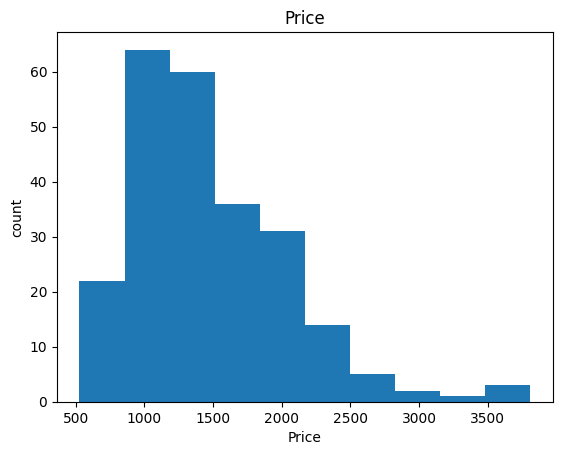

In [26]:
# Plot the histogram of "Price" column to see what the distribution looks like:

plt.pyplot.hist(df["Price"])
plt.pyplot.xlabel("Price")
plt.pyplot.ylabel("count")
plt.pyplot.title("Price")

In [27]:
# Rearrange the values into three ‘bins':

bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)

In [28]:
# Check the bins:

bins

array([ 527.        , 1621.33333333, 2715.66666667, 3810.        ])

In [29]:
# Set group names:

group_names = ['Low', 'Medium', 'High']

In [30]:
# Determine what each value of df['Price'] belongs to:

df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True )

In [31]:
# Check the result:

df[['Price','Price-binned']].head(5)

,Price,Price-binned
0,978,Low
1,634,Low
2,946,Low
3,1244,Low
4,837,Low


In [32]:
# Check the number of values in each bin:

df["Price-binned"].value_counts()

Price-binned
Low       160
Medium     72
High        6
Name: count, dtype: int64

Plot the bar graph of these bins.

Text(0.5, 1.0, 'Price bins')

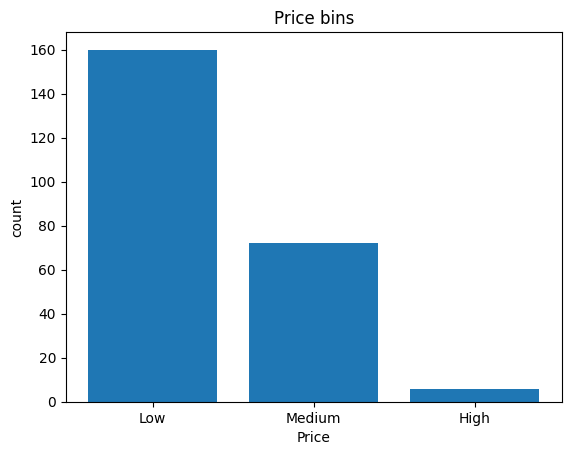

In [33]:
# Plot the distribution of each bin:

pyplot.bar(group_names, df["Price-binned"].value_counts())
plt.pyplot.xlabel("Price")
plt.pyplot.ylabel("count")
plt.pyplot.title("Price bins")

# 8. Indicator variables

In [34]:
# Convert "Screen" to indicator variables and assign it to data "dummy_variable_1":

dummy_variable_1 = pd.get_dummies(df["Screen"])

In [35]:
# Change the column names:

dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)

In [36]:
# Check the result:

dummy_variable_1.head()

,Screen-Full_HD,Screen-IPS_panel
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False


In [37]:
# Merge data "df" and "dummy_variable_1":

df = pd.concat([df, dummy_variable_1], axis=1)

In [38]:
# Drop original column "Screen" from "df"

df.drop("Screen", axis = 1, inplace=True)

In [39]:
# Check the result:

print(df.head())

   Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  Screen_Size_inch  \
0           0         Acer         4    2   1         5              14.0   
1           1         Dell         3    1   1         3              15.6   
2           2         Dell         3    1   1         7              15.6   
3           3         Dell         4    2   1         5              13.3   
4           4           HP         4    2   1         7              15.6   

   CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_pounds  Price Price-binned  \
0           0.55       8             256           3.53    978          Low   
1           0.69       4             256           4.85    634          Low   
2           0.93       8             256           4.85    946          Low   
3           0.55       8             128           2.69   1244          Low   
4           0.62       8             256           4.21    837          Low   

   Screen-Full_HD  Screen-IPS_panel  
0           False       

In [40]:
# Save the file:

df.to_csv('laptop_pricing_cleaned.csv')